In [84]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [24]:
confirmed = pd.read_csv('novel_corona_virus_2019_dataset/time_series_covid_19_confirmed.csv')

In [25]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


In [52]:
dates = confirmed.columns[4:]

In [58]:
countries = confirmed['Country/Region'].values

In [61]:
confirmed.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,2,3,5,7,8,8,14,14,14,19,...,59,70,75,82,114,147,177,212,272,322
1,2,1,2,2,4,4,7,7,11,15,...,639,639,701,773,839,825,878,889,924,963
2,0,1,3,3,4,5,7,7,10,13,...,178,178,200,212,226,243,266,313,345,385
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,149,149,197,238,428,566,673,790,900,1030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
general_data = confirmed.groupby('Country/Region').sum()

In [79]:
general_data.drop(['Lat', 'Long'], axis=1, inplace=True)

In [80]:
general_data = general_data.T

In [76]:
general_data.reset_index(inplace=True)

In [101]:
general_data.index = pd.to_datetime(general_data.index, format='%m/%d/%y')

In [105]:
general_data.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

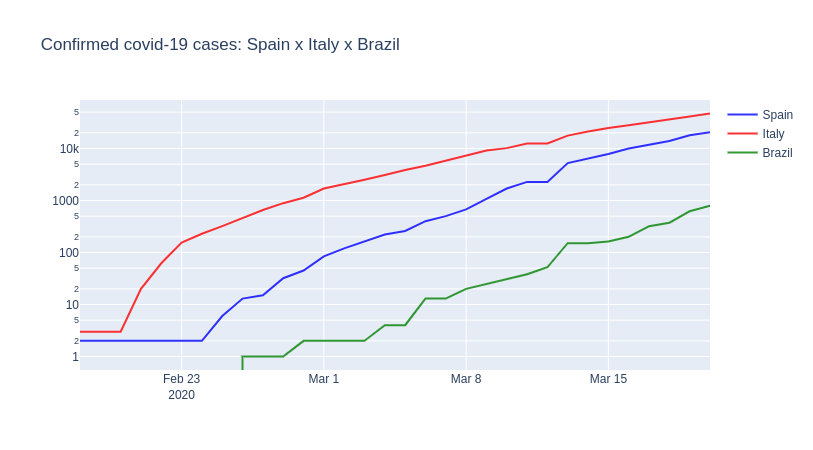

In [119]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x=general_data.index,
                y=general_data['Spain'],
                name='Spain',
                line_color='blue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=general_data.index,
                y=general_data['Italy'],
                name="Italy", 
                line_color="red", 
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=general_data.index,
                y=general_data['Brazil'],
                name="Brazil", 
                line_color="green", 
                opacity=0.8))

fig.update_layout(title_text="Confirmed covid-19 cases around the world", 
                  xaxis_range=['2020-2-18', '2020-3-20'],
                  yaxis_type='log')
fig.show()